**Classificação Multiclasse página 97**

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y = mnist['data'], mnist['target']

**conveter o target de str para int**<br>

In [4]:
y = y.astype(int)

**<br>1 - Separar dados de teste**<br>

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**<br>2 - Embaralhar os dados para**<br>

In [6]:
from sklearn.utils import shuffle

In [7]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [19]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

**<center>Classificação multiclasse com algoritmos binários - GÉRON página 98**

**A maioria dos classificadores do scikit-learn fazem classificação multiclasse.**<br><br>

**Alguns algoritmos, originalmente projetados para tarefas de classificação binária, foram adaptados para multiclasse utilizando as estratégias one-versus-the-rest (OvR) e one-vs-one (OvO), oferecidas pelo SciKit.**<br>

**Exemplos:**<br>

>**SGDClassifier**<br>
Funciona automaticamente para multiclasse com o padrão multi_class="ovr"<br>
Para usar OvO (Gerón pg 99):<br>
from sklearn.multiclass import OneVOneClassifier<br>
from sklearn.linear_model import SGDClassifier<br>
sgd_multi = OneVsRestClassifier(SGDClassifier())<br>

>**Suport Vector Machine**<br>
from sklearn.svm import SVC<br>
não é SVM, é SVC de Support Vector Classifier. Também tem SVR para problemas de regressão e LinearSVC e LinearSVR que são otimizados para problemas lineares. Classificação Linear se refere ao caso em que as classes são separáveis por uma linha (reta) ou plano sem curvaturas. O Perceptron, a Logistic Regression e o Linear SVM são exemplos de classificadores lineares.<br>
svc_ovr = SVC(decision_function_shape="ovr")<br>
svc_ovo = SVC(decision_function_shape="ovo")<br>

>**LogisticRegression**<br>
Apesar do nome é para classificação e não, regressão, prevendo classes discretas, não valores contínuos<br>
from sklearn.linear_model import LogisticRegression<br>
log_reg_ovr = LogisticRegression(multi_class="ovr")<br>
log_reg_multi = LogisticRegression(multi_class="multinomial", solver="lbfgs")<br>

>**Perceptron**<br>
per_multi = Perceptron()<br>
a etratégia é OvR, não tem a outra opção
from sklearn.multiclass import OneVsRestClassifier<br>
from sklearn.linear_model import Perceptron<br>
per_multi = OneVsRestClassifier(Perceptron())<br>

>**Naive Bayes**<br>
O scikit incluiu a classificação multiclasse nativamente, ele detecta automaticamente quantas classes tem e calcula as probabilidades condicionais para cada uma.<br>
from sklearn.naive_bayes import GaussianNB<br>
nbg = GaussianNB()<br><br>

**OvO**: problemas com poucas classes e classes próximas<br>
**OvR**: eficiente e comum para problemas com muitas classes ou quando as classes têm separações mais claras.<br><br>

In [8]:
from sklearn.linear_model import SGDClassifier

In [9]:
sgd_clf = SGDClassifier(random_state=42)

In [10]:
import time
ti = time.time()

sgd_clf.fit(X_train, y_train)

tf = time.time()
print('tempo download:', tf-ti, 'segundos')

tempo download: 156.6996374130249 segundos


In [11]:
sgd_pred = sgd_clf.predict(X_train)

In [12]:
from sklearn.metrics import confusion_matrix 
conf_mx = confusion_matrix(y_train, sgd_pred)
conf_mx

array([[5738,    1,   20,   48,    0,   44,   39,    1,   21,   11],
       [   1, 6464,   25,   39,    4,   58,   75,   10,   51,   15],
       [  54,   47, 5035,  181,   45,   78,  256,   49,  197,   16],
       [  21,   12,   83, 5574,    5,  178,   49,   33,  107,   69],
       [  28,   21,   32,   19, 5199,   56,  108,   31,   91,  257],
       [  30,   10,   20,  216,   27, 4717,  218,   22,  112,   49],
       [  34,    6,    4,    7,    6,   69, 5785,    1,    6,    0],
       [  13,   15,   65,   34,   25,   21,   11, 5801,   53,  227],
       [  20,   48,   40,  333,   23,  589,  163,   22, 4535,   78],
       [  33,    8,   26,  163,  153,  106,    8,  169,   84, 5199]],
      dtype=int64)

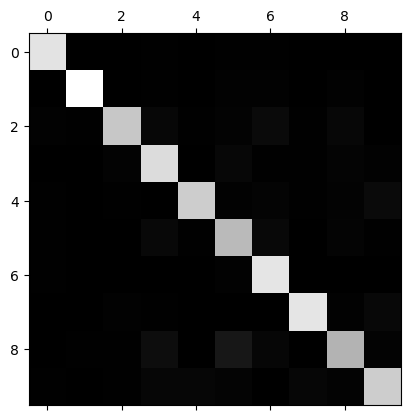

In [13]:
import matplotlib.pyplot as plt

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

**<br>Algoritmos projetados originalmente para multiclasse**<br>

>**RandomForestClassifier: Votação por múltiplas árvores.**<br>
>**DecisionTreeClassifier: Classificação direta em múltiplas classes.**<br>
>**KNeighborsClassifier: Baseado nos vizinhos mais próximos.**<br>
>**Naive Bayes (GaussianNB, MultinomialNB, BernoulliNB): Calcula probabilidades condicionais para cada classe.**<br>
>**MLPClassifier: Rede neural que suporta multiclasse diretamente.**<br>

In [34]:
digito = sgd_clf.predict(X_train.iloc[[1]])
digito, y_train.iloc[1]

(array([3]), 3)

In [32]:
y_train.iloc[1]

3

In [33]:
digito_scores = sgd_clf.decision_function(X_train.iloc[[1]])
digito_scores

array([[-24038.72544516, -36709.38820887, -10899.08416787,
          6847.75871203, -31280.87115273,  -5342.24714182,
         -8735.00572178, -33972.00832506, -10616.06013427,
         -7525.76092984]])

In [ ]:
#   O método np.argmax retorna o índice do maior valor em um array.